# 3 | _Prophet_ Modeling: Ridership, All Ridership
---
* [01 API Data Requests](01_API_pulls.ipynb)
* [01.1 Additional BART Data](01_v2_bart.ipynb.ipynb)
* [02 Initial EDA](02_EDA.ipynb)
* _[03 First Model: Prophet](03_prophet.ipynb)_
---

This notebook documents `1` model: using Facebook's `Prophet` to forecast ridership. 

* `Jan 2000` - `Apr 2022` monthly data is used. 

The model does NOT perform well. Data from ridership decline toward end of `2018` and abrupt change in `March 2022` due to COVID provide a negative trend, so the forecasts are VERY BAD. 
    * Prophet is designed to _detect_ changes, but only does so on the very first `80%` of the data, which does not include the years of interest. Manual changepoints can be visualized and implemented. 

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

/Users/gx/DSI/capstone-ga/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# CUSTOMS 
plt.style.use('gstyle.mplstyle')

import warnings
warnings.filterwarnings('ignore')

#### Function below: ensures appropriate date time `type` AND `index`, and `ds` for `Prophet` to use.

In [3]:
def date_index(df): 
    df['date'] = pd.to_datetime(df['ds'])
    df = df.set_index('date')
    df.rename(columns = {'ridership' : 'y'}, inplace = True)

    return(df)

## Ridership with Prophet

In [4]:
# importing bart data
filename = 'bart_daily.csv'
file = '../data/processed/' + filename
bart_df = pd.read_csv(file)

bart_df = date_index(bart_df)

bart_df.head()

,y,ds
date,,
2011-01-01,124162.0,2011-01-01
2011-01-02,93666.0,2011-01-02
2011-01-03,285891.0,2011-01-03
2011-01-04,322306.0,2011-01-04
2011-01-05,327006.0,2011-01-05


In [15]:
# # importing fuel data
# file = '../data/processed/fuel_m.csv'
# fuel_df = pd.read_csv(file)
# fuel_df = date_index(fuel_df)

In [6]:
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'
test_end_date = '2020-02-28'

train_df = bart_df[: train_end_date]
test_df = bart_df[test_start_date : test_end_date]

In [7]:
m = Prophet(daily_seasonality=True)       # instantiate Prophet model

# # with additional regressor:
# pro_regressor.add_regressor('fuel_m')

# fit data 
m.fit(train_df)

Initial log joint probability = -191.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5845.81     0.0010313       234.561      0.4722      0.4722      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5846.76   0.000465672       68.4434      0.9626      0.9626      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5846.97    0.00120933       75.7188      0.4218           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5846.99   8.10071e-05       93.4143   1.055e-06       0.001      436  LS failed, Hessian reset 
     389       5847.02   9.03774e-06       62.8193   1.189e-07       0.001      574  LS failed, Hessian reset 
     399       5847.02   1.24098e-05        69.539      0.6171           1      586   
    Iter      log pro

In [8]:
# make future df 
future_data = m.make_future_dataframe( periods = 365) 

# forecast on test data
forecast = m.predict(test_df)
# forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
416,2020-02-23,182156.491471,71096.856812,191432.128797,179650.861572,184283.832983,-53190.288497,-53190.288497,-53190.288497,129037.309395,...,-186488.377683,-186488.377683,-186488.377683,4260.779791,4260.779791,4260.779791,0.0,0.0,0.0,128966.202975
417,2020-02-25,182103.307897,336156.497860,446851.881862,179579.169642,184246.021018,211788.589167,211788.589167,211788.589167,129037.309395,...,75437.479591,75437.479591,75437.479591,7313.800181,7313.800181,7313.800181,0.0,0.0,0.0,393891.897064
418,2020-02-26,182076.716109,335954.437405,452210.928226,179543.456740,184227.115036,216277.268069,216277.268069,216277.268069,129037.309395,...,78732.156514,78732.156514,78732.156514,8507.802160,8507.802160,8507.802160,0.0,0.0,0.0,398353.984178
419,2020-02-27,182050.124322,335925.080233,454943.640529,179508.948430,184207.867130,213581.539516,213581.539516,213581.539516,129037.309395,...,75104.111580,75104.111580,75104.111580,9440.118541,9440.118541,9440.118541,0.0,0.0,0.0,395631.663837
420,2020-02-28,182023.532534,316590.138512,435856.491384,179475.706093,184189.303072,195309.276461,195309.276461,195309.276461,129037.309395,...,56179.601578,56179.601578,56179.601578,10092.365488,10092.365488,10092.365488,0.0,0.0,0.0,377332.808996


In [9]:
fore2 = forecast
fore2['y'] = test_df['y']

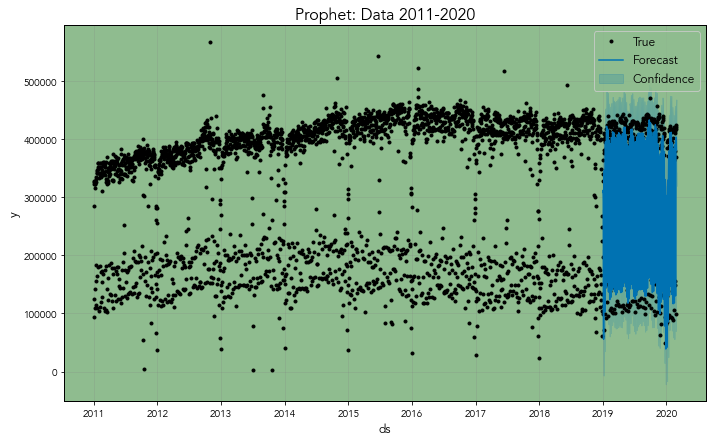

In [28]:
m.plot(forecast);
plt.title(label = 'Prophet: Data 2011-2020', fontsize=16)
plt.legend(['True', 'Forecast', 'Confidence']); 

In [13]:
m = Prophet()       # instantiate Prophet model

# # with additional regressor:
# pro_regressor.add_regressor('fuel_m')

# fit data 
m.fit(bart_df[: test_end_date])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -129.681


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       6631.02   0.000444675       225.727   4.395e-06       0.001      124  LS failed, Hessian reset 
      99       6632.22    0.00160897       85.4575           1           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6633.53   2.03221e-05       58.0811      0.3056      0.3056      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       6633.55   8.39376e-05       96.5001   1.228e-06       0.001      384  LS failed, Hessian reset 
     269       6633.55   4.00428e-07       63.7628     0.06941           1      438   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


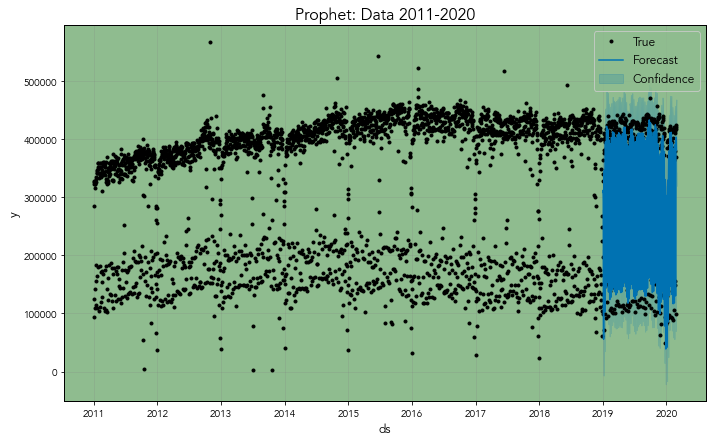

In [29]:
m.plot(forecast);
plt.title(label = 'Prophet: Data 2011-2020', fontsize=16)
plt.legend(['True', 'Forecast', 'Confidence', 'Test']);

In [15]:
# make future df 
future_data = m.make_future_dataframe( periods = 365) 

# forecast on test data
forecast = m.predict(test_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
416,2020-02-23,130398.039890,68430.870668,193277.938070
417,2020-02-25,400032.154582,337256.054201,464565.261186
418,2020-02-26,403813.246899,341523.468390,465366.520332
419,2020-02-27,401443.127149,340546.747748,463121.015125
420,2020-02-28,381664.649196,317664.398111,440446.908389


> #### Visualizing changepoints to implement: 

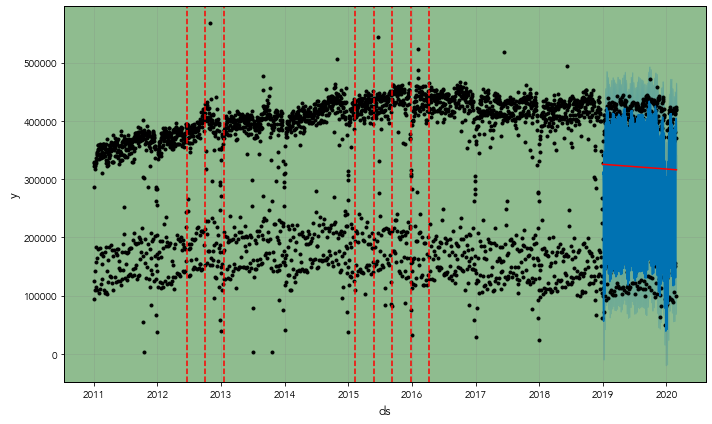

In [16]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [17]:
preds = forecast.yhat
trues = test_df.y
preds.index = trues.index
preds.shape, trues.shape

((421,), (421,))

> #### Errors on first fit: 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

mae = mean_absolute_error(trues, preds)
mse = mean_squared_error(trues, preds)
rmse = math.sqrt(mse)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MAE: 32448.621567
MSE: 2690215625.842875
RMSE: 51867.288592


ID      | MODEL   | DATA      | RMSE        | MSE       | MAE       | CV        | MAPE      | MASE      | AIC 
---     | ---     | ---        | ---       | ---       | ---       | ---       | ---       | ---       | ---  
A       | PROPHET | < 2019   | 446 152   | 199 052 198 567| 375 686   |          
B       | PROPHET | All BART   | 1 243 269   | 5 457 200 928 927| 1 181 450   |          

> ## Cross Validation over subsets of series: 
> * train on `5` years 
> * spit every window for `2` years
> * forecast for `1` year

In [19]:
# Python
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model = m, 
    initial ='1825 days',   # pd.to_timedelta(30*12,unit="D") 
    period ='730 days',     # pd.to_timedelta(30*12,unit="D")
    horizon = '365 days')

### Can also use manual cut-offs 
# cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
# df_cv2 = cross_validation(pro_regressor, cutoffs=cutoffs, horizon='365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2017-02-28 00:00:00 and 2019-02-28 00:00:00
  0%|          | 0/2 [00:00<?, ?it/s]

Initial log joint probability = -72.3101
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       4524.82    0.00111949        309.35   1.184e-05       0.001      162  LS failed, Hessian reset 
      99       4524.89   0.000724376       170.037           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141        4526.3    0.00128226       304.508   1.599e-05       0.001      256  LS failed, Hessian reset 
     181       4526.91   7.12016e-05       85.0606   9.098e-07       0.001      346  LS failed, Hessian reset 
     199       4526.91   3.11212e-07       59.5848      0.2863      0.6393      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       4526.91   3.12217e-08       65.0154     0.01164      0.3773      374   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 50%|█████     | 1/2 [00:04<00:04,  4.76s/it]

Initial log joint probability = -105.355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5949.75    0.00185742       109.759      0.4633      0.4633      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5951.03    2.3062e-07       72.6406      0.3227           1      229   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


100%|██████████| 2/2 [00:08<00:00,  4.48s/it]


In [20]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-01,430068.933450,376262.367337,490578.011926,435937.0,2017-02-28
1,2017-03-02,425324.243436,369806.877695,482423.246516,440816.0,2017-02-28
2,2017-03-03,409081.524013,350386.525422,469301.020500,424744.0,2017-02-28
3,2017-03-04,223319.877506,166616.374184,284220.460676,162997.0,2017-02-28
4,2017-03-05,170138.569863,115935.526131,230729.578741,111971.0,2017-02-28


In [21]:
forecast = m.predict(test_df)

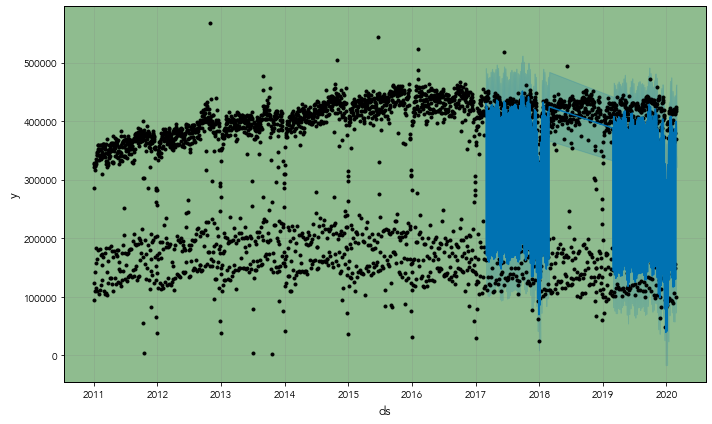

In [22]:
m.plot(df_cv);

In [23]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,7.984934e+08,28257.624796,23321.989580,0.106400,0.056089,0.096185,0.944444
1,37 days,8.202690e+08,28640.339539,23966.517336,0.110019,0.056720,0.099447,0.944444
2,38 days,8.115857e+08,28488.343827,23946.669067,0.109424,0.058172,0.099132,0.944444
3,39 days,8.767912e+08,29610.659540,24690.277779,0.111019,0.060218,0.100554,0.930556
4,40 days,8.705602e+08,29505.256384,24602.948019,0.113323,0.060218,0.101952,0.930556


In [24]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
325,361 days,2.379932e+09,48784.549286,30843.934309,0.165305,0.064385,0.134457,0.916667
326,362 days,2.422508e+09,49218.983715,31627.467235,0.169975,0.067197,0.138221,0.916667
327,363 days,2.156809e+09,46441.455792,30349.755606,0.159910,0.064385,0.131620,0.923611
328,364 days,1.837542e+09,42866.565865,28317.457077,0.142923,0.062648,0.120005,0.944444
329,365 days,1.831660e+09,42797.897127,28035.117410,0.142270,0.062648,0.119327,0.944444


ID      | MODEL   | DATA      | RMSE        | MSE       | MAE       | MAPE      | MASE      | AIC |
---     | ---     | ---        | ---       | ---       | ---       | ---       | ---       | ---       
A       | PROPHET | < 2019   | 446 152   | 199 052 198 567| 375 686   |      
B       | PROPHET | All BART, CV   |167 050   | 2 790 595 000| 1 181 450   | 0.102         

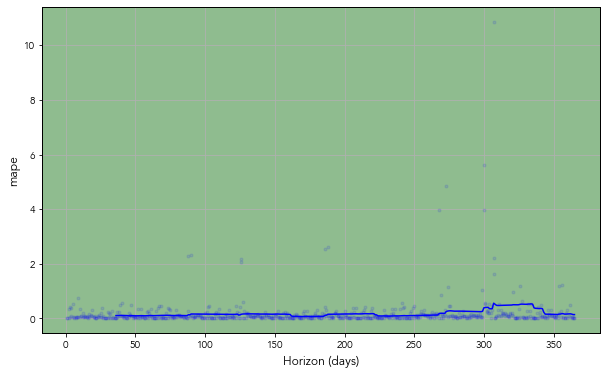

In [25]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

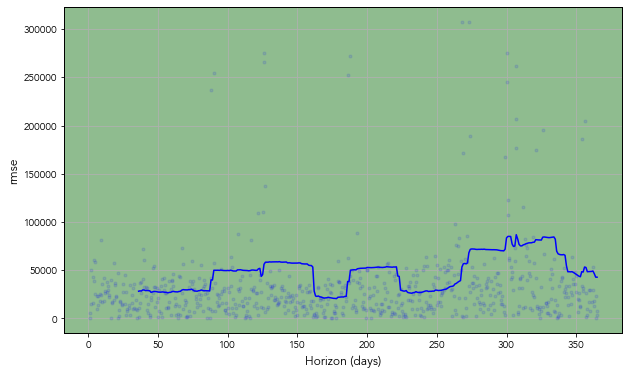

In [26]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

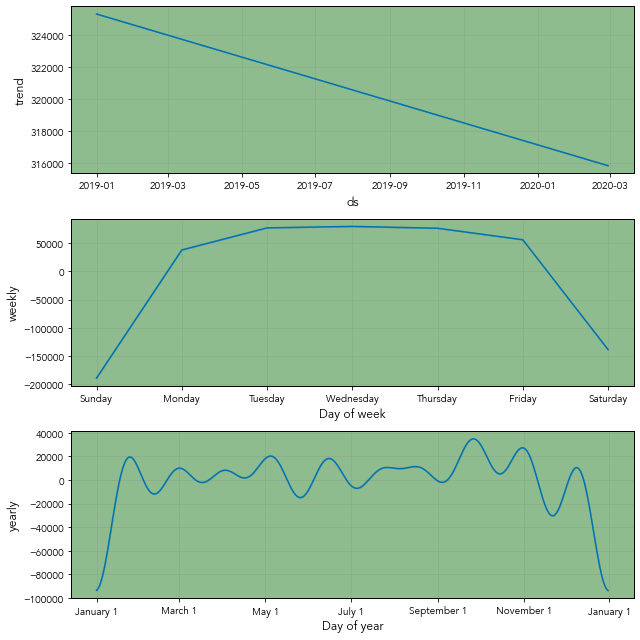

In [27]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

plot_components_plotly(m, forecast)

fig2 = m.plot_components(forecast)